<a href="https://colab.research.google.com/github/TanuSingh2003/Project1/blob/main/NAdam_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NAdam Algorithm Explained with Python Implementation

## Introduction

NAdam (Nesterov-accelerated Adaptive Moment Estimation) is an optimization algorithm that combines the benefits of both Nesterov accelerated gradient and the Adam optimizer. It aims to improve the convergence speed and accuracy of deep learning models.

### NAdam Algorithm Steps

NAdam modifies the Adam optimizer by incorporating Nesterov momentum. The update rule for NAdam can be summarized as follows:

1. **Initialize parameters**:
   - Learning rate \(\alpha\)
   - Exponential decay rates for the moment estimates \(\beta_1\) and \(\beta_2\)
   - Small constant \(\epsilon\) to prevent division by zero
   - Initial parameter values \(\theta_0\)
   - Initial moment estimates \(m_0 = 0\) and \(v_0 = 0\)

2. **Update biased first moment estimate**:
   \[
   m_t = \beta_1 m_{t-1} + (1 - \beta_1) g_t
   \]
   where \(g_t\) is the gradient of the objective function at time step \(t\).

3. **Update biased second moment estimate**:
   \[
   v_t = \beta_2 v_{t-1} + (1 - \beta_2) g_t^2
   \]

4. **Compute bias-corrected first moment estimate**:
   \[
   \hat{m}_t = \frac{m_t}{1 - \beta_1^t}
   \]

5. **Compute bias-corrected second moment estimate**:
   \[
   \hat{v}_t = \frac{v_t}{1 - \beta_2^t}
   \]

6. **Update parameters**:
   \[
   \theta_t = \theta_{t-1} - \frac{\alpha}{\sqrt{\hat{v}_t} + \epsilon} \left( \beta_1 \hat{m}_t + \frac{(1 - \beta_1)}{(1 - \beta_1^t)} g_t \right)
   \]

### Example Function

We will use the NAdam optimizer to minimize the function \(f(x, y) = x^2 + y^2\).

---



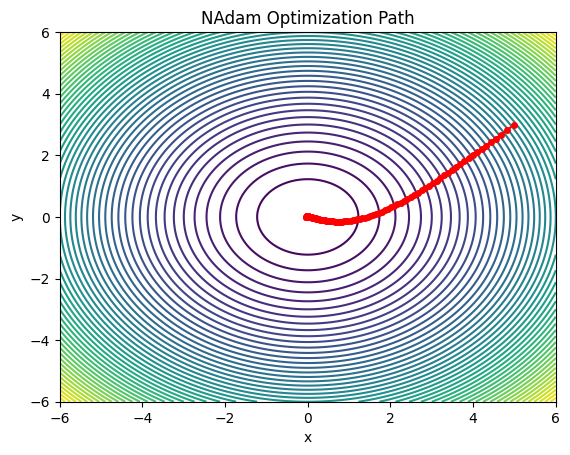

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Example function and its gradient
def f(x, y):
    return x**2 + y**2

def grad_f(x, y):
    return np.array([2*x, 2*y])

# NAdam optimizer implementation
class NAdam:
    def __init__(self, lr=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.m = None
        self.v = None
        self.t = 0

    def update(self, params, grads):
        if self.m is None:
            self.m = np.zeros_like(params)
        if self.v is None:
            self.v = np.zeros_like(params)

        self.t += 1
        self.m = self.beta1 * self.m + (1 - self.beta1) * grads
        self.v = self.beta2 * self.v + (1 - self.beta2) * grads**2

        m_hat = self.m / (1 - self.beta1**self.t)
        v_hat = self.v / (1 - self.beta2**self.t)

        params -= self.lr * ((self.beta1 * m_hat + (1 - self.beta1) * grads / (1 - self.beta1**self.t)) / (np.sqrt(v_hat) + self.epsilon))

        return params

# Initialize parameters
params = np.array([5.0, 3.0])
nadam = NAdam(lr=0.1)

# Store parameters for visualization
params_history = [params.copy()]

# Perform optimization
for i in range(100):
    grads = grad_f(params[0], params[1])
    params = nadam.update(params, grads)
    params_history.append(params.copy())

# Convert history to numpy array for easier handling
params_history = np.array(params_history)

# Visualization
x = np.linspace(-6, 6, 400)
y = np.linspace(-6, 6, 400)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

plt.contour(X, Y, Z, levels=50, cmap='viridis')
plt.plot(params_history[:, 0], params_history[:, 1], 'ro-', markersize=4)
plt.xlabel('x')
plt.ylabel('y')
plt.title('NAdam Optimization Path')
plt.show()
